In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Our Import Statements
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import ceil
from pathlib import Path
from seaborn import heatmap
from skimage.transform import rescale
from sklearn.metrics import confusion_matrix

from tensorflow.random import set_seed
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.layers import Dropout

from tensorflow import random
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


set_seed(4)

c:\users\rustem\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\rustem\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\rustem\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [81]:
keras.backend.clear_session()
model_LeNet5 = Sequential(name = 'Conv-14x14')

model_LeNet5.add(layers.Conv2D(trainable=True, filters=2, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(14, 14, 1)))
model_LeNet5.add(layers.AveragePooling2D(pool_size=(2,2)))

model_LeNet5.add(layers.Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='relu'))
model_LeNet5.add(layers.Flatten())

model_LeNet5.add(layers.Dense(84, activation='relu'))
model_LeNet5.add(layers.Dense(28, activation="softmax"))


model_LeNet5.summary()

Model: "Conv-14x14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 2)         20        
_________________________________________________________________
average_pooling2d (AveragePo (None, 6, 6, 2)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 120)         6120      
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                40404     
_________________________________________________________________
dense_1 (Dense)              (None, 28)                2380      
Total params: 48,924
Trainable params: 48,924
Non-trainable params: 0
____________________________________________________

In [32]:
def changeKernels(layer, filters):
    c = layer.get_weights().copy()
    for i in range(len(filters)):
        c[0][:,:,0,:][:,:,i] = filters[i]
    layer.set_weights(c)
    
filter1 = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ], dtype='float32')
filter2 = np.array([
        [9, 8, 7],
        [6, 5, 4],
        [3, 2, 1]
    ], dtype='float32')
changeKernels(model_LeNet5.layers[0], [filter1, filter2])
model_LeNet5.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 2) dtype=float32, numpy=
 array([[[[1., 9.]],
 
         [[2., 8.]],
 
         [[3., 7.]]],
 
 
        [[[4., 6.]],
 
         [[5., 5.]],
 
         [[6., 4.]]],
 
 
        [[[7., 3.]],
 
         [[8., 2.]],
 
         [[9., 1.]]]], dtype=float32)>,
 <tf.Variable 'conv2d/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

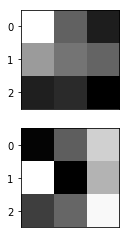

In [89]:
import matplotlib.pyplot as plt

def plot2D(row, col, images, title='', x_ticks=[], y_ticks=[]):
    for i in range(len(images)):
        plt.subplot(row, col, i+1)
        plt.imshow(images[i], 'gray')
        plt.title(title)
        plt.xticks([])
        plt.xticks([])
    plt.show()
    return



def plot_kernels_weights(weights, row, col):
    #weights, bias= layer.get_weights()
    f_min, f_max = weights.min(), weights.max()
    filters = (weights - f_min) / (f_max - f_min)  
    filters_new = []
    for i in range(filters.shape[3]):
        filters_new.append(filters[:,:,:, i][:,:, 0])
        #print(filters[:,:,:, i][:,:, 0])
    plot2D(row, col, filters_new)
    return

def plot_kernels_layer(layer, row, col):
    plot_kernels_weights(layer.get_weights()[0], row, col)

def plot_kernels_compare(both_weights):   
    filters_new = []
    for weights in both_weights:
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        for i in range(filters.shape[3]):
            filters_new.append(filters[:,:,:, i][:,:, 0])
    plot2D(len(both_weights), both_weights[0].shape[3], filters_new)
    return

plot_kernels_layer(model_LeNet5.layers[0], 2, 1)

both_weights = []

#BEFORE training
both_weights.append(model.layers[0].get_weights)

# AFTER training
both_weights.append(model.layers[0].get_weights)

plot_kernels_compare(both_weights)

In [84]:
layer.get_weights().copy()

[array([[[[1., 9.]],
 
         [[2., 8.]],
 
         [[3., 7.]]],
 
 
        [[[4., 6.]],
 
         [[5., 5.]],
 
         [[6., 4.]]],
 
 
        [[[7., 3.]],
 
         [[8., 2.]],
 
         [[9., 1.]]]], dtype=float32), array([0., 0.], dtype=float32)]

In [ ]:
# *** Real work with Kernels ***

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Our Import Statements
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import ceil
from pathlib import Path
from seaborn import heatmap
from skimage.transform import rescale
from sklearn.metrics import confusion_matrix

from tensorflow.random import set_seed
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.layers import Dropout

from tensorflow import random
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


set_seed(4)

In [ ]:
# Methods for READING IMAGES/LABELS

def padding(image, shape):
    
    def seperate_pad_width(width):
        return (width // 2, ceil(width / 2))
    
    padding_axis = [seperate_pad_width(abs(image.shape[0] - shape[0])),
                    seperate_pad_width(abs(image.shape[1] - shape[1]))]
    image = np.pad(image, (padding_axis[0], padding_axis[1], (0,0)), constant_values = 0)
    
    return image

def resample(image, shape_read_file, shape_with_padding):
   
    ratio = min(shape_read_file[0] / image.shape[0], shape_read_file[1] / image.shape[1])
    image = rescale(image, ratio, order = 1, preserve_range = True, multichannel = True)
    
    image = padding(image, shape_with_padding) # * shape    
    
    return image

def read_file(path, shape_read_file, shape_with_padding, is_gray=False, is_gonna_be_resampled=True):
    X, Y = [], []
    file = open(path, 'r')
    file.readline() # ignore  header
    
    for line in file:
        temp = line[ :-1].split('#')
        
        image_height = int(temp[3])
        image_width = int(temp[4])
        
        if is_gray:
            image = temp[-1].split(';')
        else:
            image = [(ord(i) & 1) * 255 for i in temp[-1]]
        image = np.array(image, dtype = 'uint8')
        
        image.resize(image_height, image_width, 1)
        if is_gonna_be_resampled:
            image = resample(image, shape_read_file, shape_with_padding)
            
        label = int(temp[0])
        
        X.append(image)
        Y.append(label)
        
    image_count = len(Y)
    if not is_gonna_be_resampled:
        width = max(len(im[0]) for im in X)
        height = max(len(im) for im in X)
        #print(width, height)
        for i in range(len(X)):
            X[i] = resample(X[i], (width, height, 1), (width, height, 1))
    
    X = np.array(X, dtype = 'uint8')
    Y = to_categorical(Y, dtype = 'uint8') # num_classes = 10,  * , num_classes = len(Y)
    return X,Y

def read_preapare_db(path, shape_read_file, shape_with_padding):
    is_gray = False #'gray' in str(path)
    X, Y = read_file(path, shape_read_file, shape_with_padding, is_gray)
    #X = vpadding(X, shape)
    X = X.astype('float32')
    X /= 255
    return X,Y

def read_preapare_db_original_size(path, shape_read_file=(20,20,1), shape_with_padding=(32,32,1)):
    is_gray = False #'gray' in str(path)
    X, Y = read_file(path, shape_read_file, shape_with_padding, is_gray, is_gonna_be_resampled=False)
    #X = vpadding(X, shape)
    X = X.astype('float32')
    X /= 255
    return X,Y

def read_prepare_db_pdc(path, shape_read_file, shape_with_padding, is_gray=False):
    X, Y = [], []
    file = open(path, 'r')
    file.readline() # ignore  header
    
    for line in file:
        temp = line[ :-1].split('#')
        
        image_height = int(temp[3])
        image_width = int(temp[4])
        
        image = temp[-1].split(';')
        """
        if is_gray:
            image = temp[-1].split(';')
        else:
            image = [(ord(i) & 1) * 255 for i in temp[-1]]
        """
        try:
            image = np.array(image, dtype = 'float32')
        except ValueError as e:
            print(temp[-1])
        
        #image = np.array(image, dtype = 'float32')
        
        #image.resize(image_height, image_width, 1)
        #image = resample(image, shape_read_file, shape_with_padding)
        
        label = int(temp[0])
        
        X.append(image)
        Y.append(label)
        
    #image_count = len(Y)
    X = np.array(X, dtype = 'float32')
    Y = to_categorical(Y, dtype = 'uint8') # num_classes = 10, 
    return X,Y

In [ ]:
# Prepare TRAIN/TEST DATA

def augment(x_train_original, y_train_original, n, is_shuffled = True):
    datagen = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
      width_shift_range=0,
      height_shift_range=0,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')

    it = datagen.flow(x_train_original, y_train_original, batch_size=14000, shuffle=is_shuffled, seed=0) #x_train_32x32 #.reshape(14000, 32, 32, 1)
    x, y = it.next()
    for i in range(n-1):
        temp_x, temp_y = it.next()
        x = np.concatenate((x, temp_x), axis=0)
        y = np.concatenate((y, temp_y), axis=0)
        print(temp_y.shape)
        print(x.shape)
    return x, y #data

def extract_spec_size(x_train_original, shape_read_file, shape_with_padding):
    x_train_new = list()
    for i in range(len(x_train_original)):
        x_train_new.append(resample(x_train_original[i], shape_read_file, shape_with_padding))
    x_train_new = np.array(x_train_new, dtype = 'float32')
    return x_train_new

aug_size = 5
# PREPARE 32x32, 20x20 from AUGMENTED
x_train_original, y_train_original = read_preapare_db_original_size(Path('datasets/500-100/HandChars_500_woI_Train.txt').absolute())
x_train_original, y_train_original = augment(x_train_original, y_train_original, n=aug_size, is_shuffled = False) # n * 14000

y_train = y_train_original
x_train_32x32 = extract_spec_size(x_train_original, (20, 20, 1), (32, 32, 1))

# 100 Test
x_test_32x32, y_test = read_preapare_db(Path('datasets/500-100/HandChars_100_Test.txt').absolute(), (20, 20, 1), (32, 32, 1))

In [ ]:
class My_Model:
    models = []

    def __init__(self, model,
                 seed, pooling,
                 name, params_count, epochs,
                 acc_train, loss_train,
                 acc_test, loss_test):
        self.model = model
        self.seed = seed
        self.pooling = pooling
        self.name = name
        self.params_count = params_count
        self.epochs = epochs
        self.acc_train = acc_train
        self.loss_train = loss_train
        self.acc_test = acc_test
        self.loss_test = loss_test
        
        models.append(self)
        
    def get_by_acc_test():
        return models[np.argmax([my_models.acc_test for my_models in models])]

    def get_by_loss_test():
        return models[np.argmin([my_models.loss_test for my_models in models])]
    
    def get_by_loss_train():
        return models[np.argmin([my_models.loss_train for my_models in models])]
        #return f"{self.name} is {self.age} years old"
        
    def add_model(model):
        models.append(model)
    
    def all_models():
        return models

In [ ]:
def conf_2x2(Y_classes, Y_pred_classes, label_map, model_name, seed):
    
    confusion_mtx = confusion_matrix(Y_classes, Y_pred_classes) 
    dpi_num = 400
    plt.subplots(figsize = (28, 28)) #3.6, 3   1024/dpi_num, 1024/dpi_num
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(model_name + ', Seed: ' + str(seed))

    heatmap(confusion_mtx, annot = True, linewidths = 0.02, cmap = "Greys", linecolor = "gray",
            xticklabels = label_map, yticklabels = label_map, fmt='d')
    plt.savefig('output/expertising_model/conf_azhand_custom_conv_seed-{1}_{0}.png'.format(model_name, seed), dpi=dpi_num)
    
    #plt.show()
    
    return
    
def changeKernels(layer, filters):
    c = layer.get_weights().copy()
    for i in range(len(filters)):
        c[0][:,:,0,:][:,:,i] = filters[i]
    layer.set_weights(c)

# *** EDIT FILTERS HERE ***
filter1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype='float32')

filter2 = np.array([
    [9, 8, 7],
    [6, 5, 4],
    [3, 2, 1]
], dtype='float32')

filters = [filter1, filter2]

EPOCHS = 200
callback = EarlyStopping(monitor='loss', min_delta=0.01, patience=5)
results_df = pd.DataFrame(columns=['Seed', 'Pooling2D', 'Model', 'Param-Count', 'Epochs',
                                   'Accuracy-Train', 'Loss-Train', 'Accuracy-Test', 'Loss-Test'])
models = []
for Pooling2D in (layers.AveragePooling2D,layers.MaxPooling2D):
    for seed in range(5):   #layers.MaxPooling2D, 
        set_seed(seed)
        
        # conv 1
        keras.backend.clear_session()
        model_LeNet5 = Sequential(name = str('LeNet5' + '-' + str(Pooling2D)[47:-2] + '_seed-' + str(seed)))
        
        model_LeNet5.add(layers.Conv2D(filters=6,  kernel_size=(5,5), padding='valid', activation='relu', input_shape=(32, 32, 1)))
        
        changeKernels(model_LeNet5.layers[0], filters)
        
        model_LeNet5.add(Pooling2D(pool_size = (2,2)))

        model_LeNet5.add(layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
        model_LeNet5.add(Pooling2D(pool_size=(2,2)))

        model_LeNet5.add(layers.Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='relu'))
        model_LeNet5.add(layers.Flatten())

        model_LeNet5.add(layers.Dense(84, activation='relu'))
        model_LeNet5.add(layers.Dense(28, activation="softmax"))


        model_LeNet5.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics = ['accuracy'])
        fitted_results = model_LeNet5.fit(x_train_32x32, y_train, epochs = EPOCHS, shuffle = True, callbacks=[callback], verbose=0) #callbacks=[callback],
        
        loss_train_LeNet5, acc_train_LeNet5 = model_LeNet5.evaluate(x_train_32x32, y_train, verbose=0)
        loss_test_LeNet5, acc_test_LeNet5 = model_LeNet5.evaluate(x_test_32x32, y_test, verbose=0)
        
        results_df.loc[len(results_df)] = [str(seed), str(Pooling2D)[47:-2], str(model_LeNet5.name),
                                           str(model_LeNet5.count_params()),
                                           len(fitted_results.history['loss']),
                                           acc_train_LeNet5, loss_train_LeNet5,
                                           acc_test_LeNet5, loss_test_LeNet5]
        print(results_df.loc[len(results_df)-1,:].tolist())
        #models.append()
        My_Model.add_model(My_Model(model_LeNet5,
            seed, str(Pooling2D)[47:-2], str(model_LeNet5.name), model_LeNet5.count_params(),
            len(fitted_results.history['loss']),
            acc_train_LeNet5, loss_train_LeNet5,
            acc_test_LeNet5, loss_test_LeNet5
        ))
        
        y_pred_classes = np.argmax(model_LeNet5.predict(x_test_32x32), axis = 1) 
        y_classes = np.argmax(y_test, axis = 1)
        conf_2x2(y_classes, y_pred_classes, 'ABCÇDEƏFGHIJKQLMNOPRSŞTUVXYZ', model_LeNet5.name + '-' + str(Pooling2D)[47:-2], seed)
    
    results_df.to_csv(r'output/expertising_model/Results_train-custom-CONV-added.csv', index = False)